# Exploratory Data Analysis

In [4]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib



In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('crop_yield.csv')


In [7]:
df.head(10)

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909
5,Dry chillies,1997,Whole Year,Assam,13587.0,9073,2051.4,1293074.79,4211.97,0.643636
6,Gram,1997,Rabi,Assam,2979.0,1507,2051.4,283511.43,923.49,0.465455
7,Jute,1997,Kharif,Assam,94520.0,904095,2051.4,8995468.40,29301.20,9.919565
8,Linseed,1997,Rabi,Assam,10098.0,5158,2051.4,961026.66,3130.38,0.461364
9,Maize,1997,Kharif,Assam,19216.0,14721,2051.4,1828786.72,5956.96,0.615652


In [8]:
df.shape


(19689, 10)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [10]:
df.isnull().sum()

Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64

## Overview
**In exploratory data analysis there are various steps involved in data analysis 
1. first , we'll start with labelling all the column types whether they are Numerical,categorical or mixed
2. After that , we'll be doing univariate analysis  i.e., analysis over a single variable or single coulmn
3. later on , we'll do bivariate analysis i.e, analysis over a pair of column
4. Writing conclusions drwan from the data
5. feature engineering if required

## 1.Labelling


** Numerical Columns::Area,Production,Annual Rainfall,Fertiliser,Pesticides,Yield,Crop_Year





** Categorical Columns::Crop,Season,State







** Mixed Columns::None

# Area
the conclusions that can be drawn for this column is that
1. The data set is highly skewed (positively)
2. Mean area is 1.8 unit approx
3. It suggests that  most regions have small areas, a few have extremely large sizes
4. no null values as each column contains a value

In [14]:
# We'll do univariate analysis of each of the numerical column 
df['Area'].describe()

count    1.968900e+04
mean     1.799266e+05
std      7.328287e+05
min      5.000000e-01
25%      1.390000e+03
50%      9.317000e+03
75%      7.511200e+04
max      5.080810e+07
Name: Area, dtype: float64

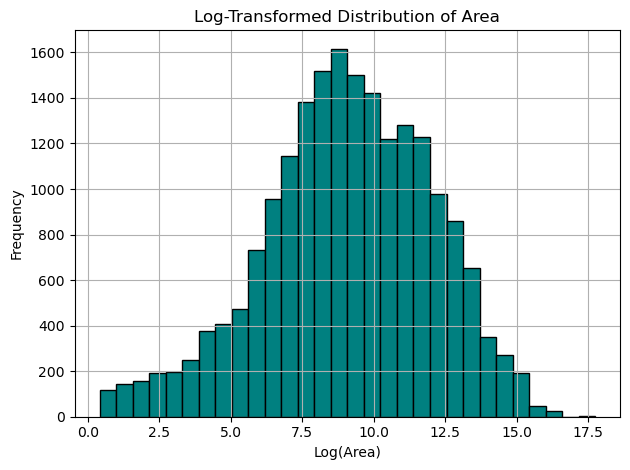

In [15]:

# Apply a log transformation to 'Area' before plotting
log_area = np.log1p(df['Area'])

log_area.plot(kind='hist', bins=30, color='teal', edgecolor='black')
plt.title('Log-Transformed Distribution of Area')
plt.xlabel('Log(Area)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()



df['Area'].skew()


### checking for outliers

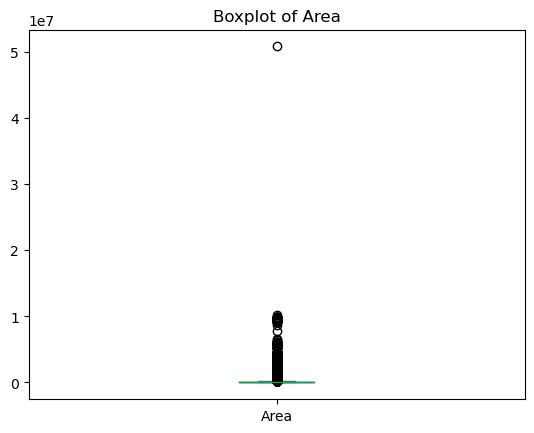

In [18]:
# Checking for Outliers
df['Area'].plot(kind='box')
plt.title('Boxplot of Area')
plt.show()

In [19]:
# Define the 1st and 99th percentiles
lower_percentile = df['Area'].quantile(0.01)
upper_percentile = df['Area'].quantile(0.99)

# Detect outliers based on percentiles
outliers_percentile = df[(df['Area'] < lower_percentile) | (df['Area'] > upper_percentile)]
outliers_count_percentile = len(outliers_percentile)
outliers_count_percentile


380

## Production
** conclusions**


1.The Production data is highly right-skewed with a skewness of 19.30.



2. The boxplot shows significant outliers i.e. 388 

In [21]:
df['Production'].describe()

count    1.968900e+04
mean     1.643594e+07
std      2.630568e+08
min      0.000000e+00
25%      1.393000e+03
50%      1.380400e+04
75%      1.227180e+05
max      6.326000e+09
Name: Production, dtype: float64

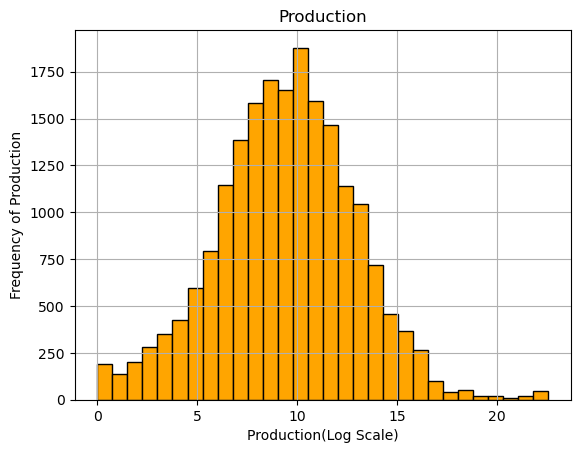

In [22]:
log_Production=np.log1p(df['Production'])
log_Production.plot(kind='hist',bins=30,color='orange' , edgecolor='black')
plt.title('Production')
plt.xlabel('Production(Log Scale)')
plt.ylabel('Frequency of Production')
plt.grid(True)
# plt.tight_layout()
plt.show()

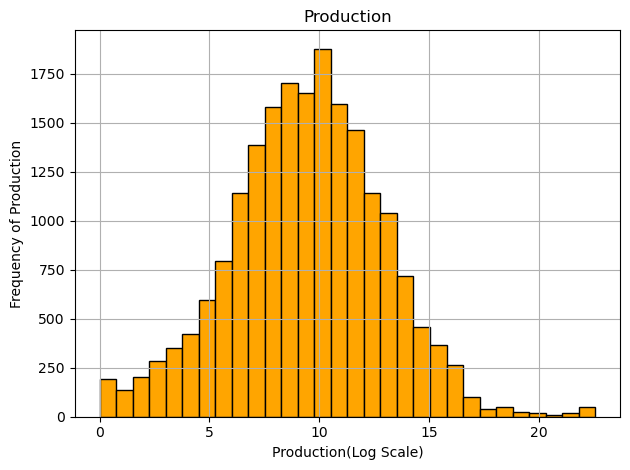

In [106]:
log_Production=np.log1p(df['Production'])
log_Production.plot(kind='hist',bins=30,color='orange' , edgecolor='black')
plt.title('Production')
plt.xlabel('Production(Log Scale)')
plt.ylabel('Frequency of Production')
plt.grid(True)
plt.tight_layout()
plt.show()

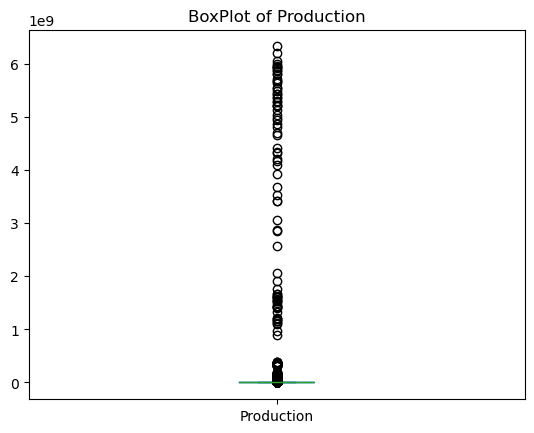

In [23]:
# Check Outliers for Production
df['Production'].plot(kind='box')
plt.title('BoxPlot of Production')
plt.show()

In [24]:
# Define the 1st and 99th percentiles
lower_percentile = df['Production'].quantile(0.01)
upper_percentile = df['Production'].quantile(0.99)

# Detect outliers based on percentiles
outliers_percentile = df[(df['Production'] < lower_percentile) | (df['Production'] > upper_percentile)]
outliers_count_percentile = len(outliers_percentile)
outliers_count_percentile


388

In [25]:
# For missing Values
df['Production'].isnull().sum()

0

# Annual Rainfall
**Conclusion**
1. The data set contains no null values
2. The min rainfall is 301.00
3. 25% of times the rainfall is 940
4. 50% of the times the rainfall qty is approx 1250
5.   75% of times the rainfall  is 1643
6.   Outliers are  349
7.   The data is posititvely skewed 
 
 

  
 

In [27]:
df['Annual_Rainfall'].describe()

count    19689.000000
mean      1437.755177
std        816.909589
min        301.300000
25%        940.700000
50%       1247.600000
75%       1643.700000
max       6552.700000
Name: Annual_Rainfall, dtype: float64

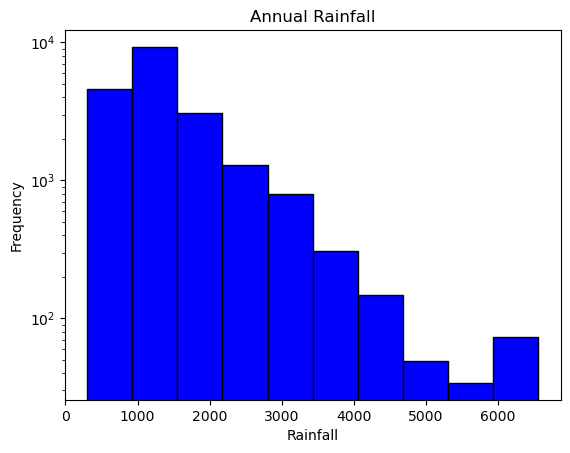

In [28]:
df['Annual_Rainfall'].plot(kind='hist',color='blue',edgecolor='black')
plt.title('Annual Rainfall')
plt.xlabel('Rainfall')
plt.yscale('log')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 1.0, 'Box plot of Annual Rainfall')

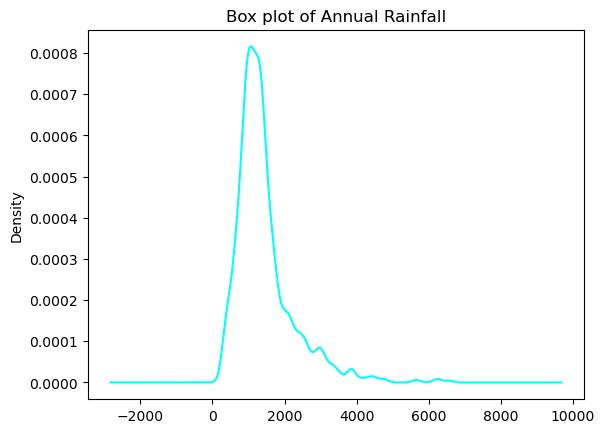

In [29]:
df['Annual_Rainfall'].plot(kind='kde' ,color='cyan')
plt.title('Box plot of Annual Rainfall')

In [30]:
df['Annual_Rainfall'].skew()

2.1317850114644354

Text(0.5, 1.0, 'Box plot of Annual Rainfall')

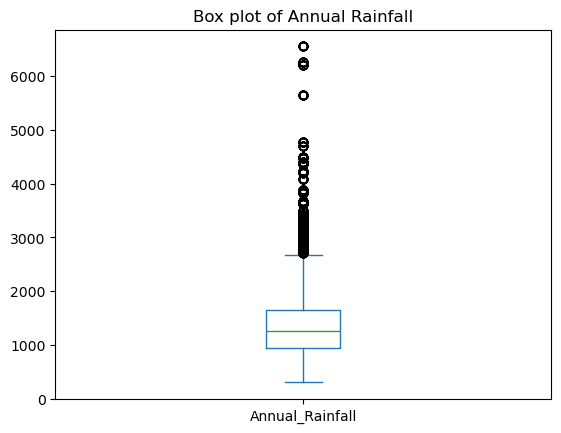

In [31]:
df['Annual_Rainfall'].plot(kind='box')
plt.title('Box plot of Annual Rainfall')


In [32]:
# Checking outliers for Annual Rainfall
# Define the 1st and 99th percentiles
lower_percentile = df['Annual_Rainfall'].quantile(0.01)
upper_percentile = df['Annual_Rainfall'].quantile(0.99)

# Detect outliers based on percentiles
outliers_percentile = df[(df['Annual_Rainfall'] < lower_percentile) | (df['Annual_Rainfall'] > upper_percentile)]
outliers_count_percentile = len(outliers_percentile)
outliers_count_percentile


349

In [33]:
# For missing Values
df['Annual_Rainfall'].isnull().sum()/len(df['Annual_Rainfall'])



0.0

## Fertilizer
1. Fertilizer use range from 54.27 units to 4.83 billion units
2. The distribution is positively skewed
3. there is no null value

In [35]:
print(df['Fertilizer'].describe())

count    1.968900e+04
mean     2.410331e+07
std      9.494600e+07
min      5.417000e+01
25%      1.880146e+05
50%      1.234957e+06
75%      1.000385e+07
max      4.835407e+09
Name: Fertilizer, dtype: float64


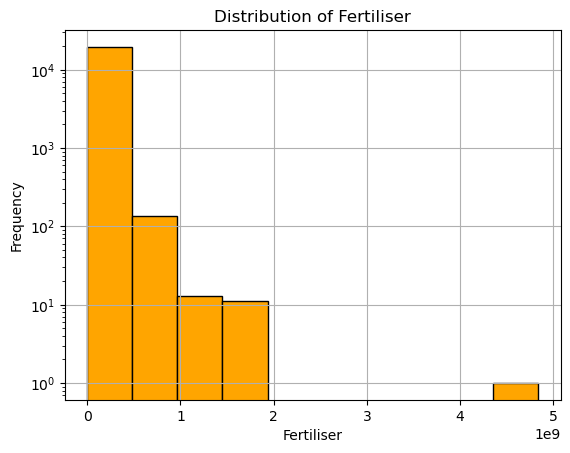

In [36]:
df['Fertilizer'].plot(kind='hist', color='orange',edgecolor='black')
plt.title('Distribution of Fertiliser')
plt.xlabel('Fertiliser')
plt.ylabel('Frequency')
plt.yscale('log') 
plt.grid(1)
plt.show()

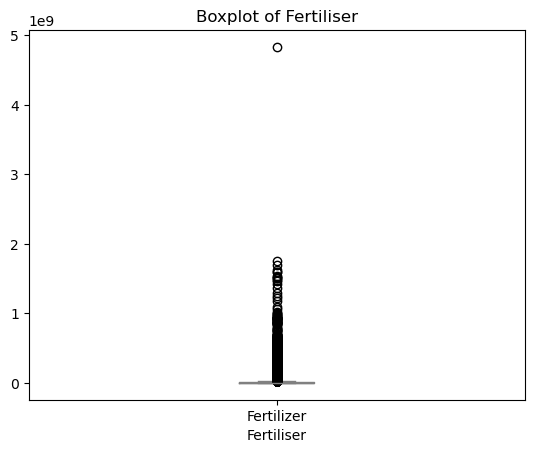

In [37]:
df['Fertilizer'].plot(kind='box',color='grey')
plt.title('Boxplot of Fertiliser')
plt.xlabel('Fertiliser')
plt.show()

In [38]:
# Checking for no of outliers
# Define the 1st and 99th percentiles
lower_percentile = df['Fertilizer'].quantile(0.01)
upper_percentile = df['Fertilizer'].quantile(0.99)

# Detect outliers based on percentiles
outliers_percentile = df[(df['Fertilizer'] < lower_percentile) | (df['Fertilizer'] > upper_percentile)]
outliers_count_percentile = len(outliers_percentile)
outliers_count_percentile

391

13.412598810025766

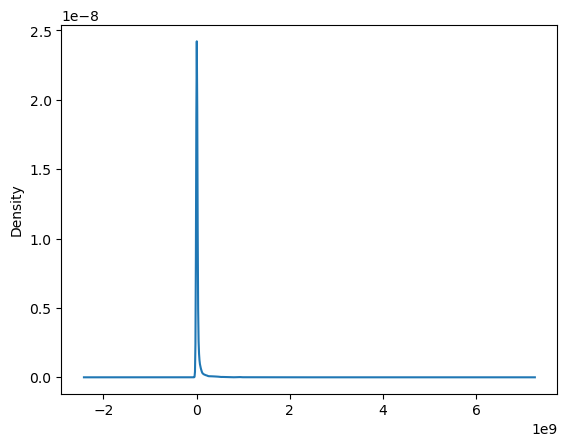

In [39]:
df['Fertilizer'].plot(kind='kde')
df['Fertilizer'].skew()

In [40]:
# check for null values 
df['Fertilizer'].isnull().sum()

0

## Pesticide
**Conclusions**
1. There is no null value in the dataset


2. It is highly right-skewed(positively) 

3. There are a lot of Outliers:: 390 that will eventually affect the analysis



In [42]:
print(df['Pesticide'].describe())

count    1.968900e+04
mean     4.884835e+04
std      2.132874e+05
min      9.000000e-02
25%      3.567000e+02
50%      2.421900e+03
75%      2.004170e+04
max      1.575051e+07
Name: Pesticide, dtype: float64


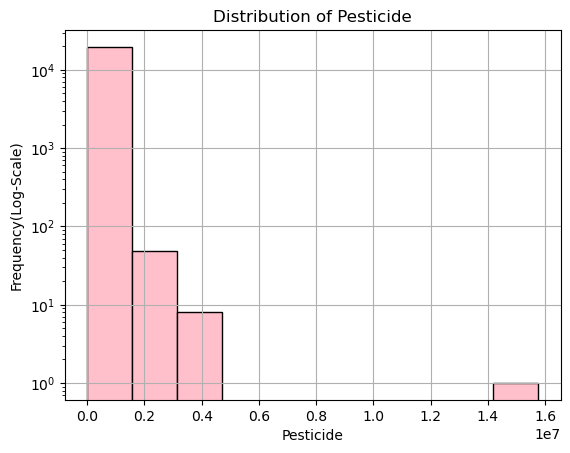

In [43]:
df['Pesticide'].plot(kind='hist', color='Pink',edgecolor='black')
plt.title('Distribution of Pesticide')
plt.xlabel('Pesticide')
plt.ylabel('Frequency(Log-Scale)')
plt.yscale('log')
plt.grid(True)
plt.show()

390

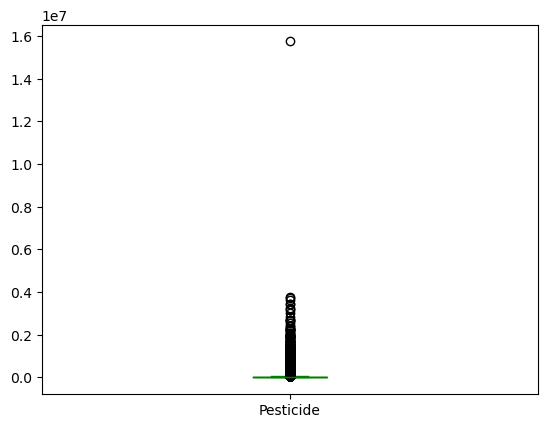

In [44]:
# Checking for outliers
df['Pesticide'].plot(kind='box',color='green')
# Define the 1st and 99th percentiles
lower_percentile = df['Pesticide'].quantile(0.01)
upper_percentile = df['Pesticide'].quantile(0.99)

# Detect outliers based on percentiles
outliers_percentile = df[(df['Pesticide'] < lower_percentile) | (df['Pesticide'] > upper_percentile)]
outliers_count_percentile = len(outliers_percentile)
outliers_count_percentile

25.635746086843607

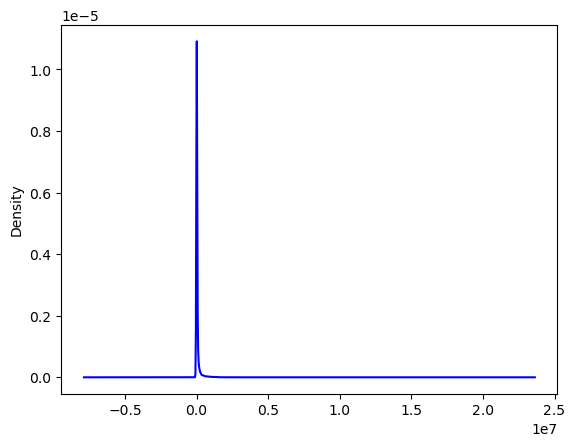

In [45]:
df['Pesticide'].plot(kind='kde',color='blue')
df['Pesticide'].skew()


In [46]:
df['Pesticide'].isnull().sum()

0

## Yield
**Conclusion**
1. Yield ranges from 0 to 21105 representing different crop with  varying yield
2. Some crops may  have very low or even zero yield
3. th median yield is only 1.03
4. There are various outliers and its number is 394
5. Data set is highly right- skewed 

In [48]:
print(df['Yield'].describe())

count    19689.000000
mean        79.954009
std        878.306193
min          0.000000
25%          0.600000
50%          1.030000
75%          2.388889
max      21105.000000
Name: Yield, dtype: float64


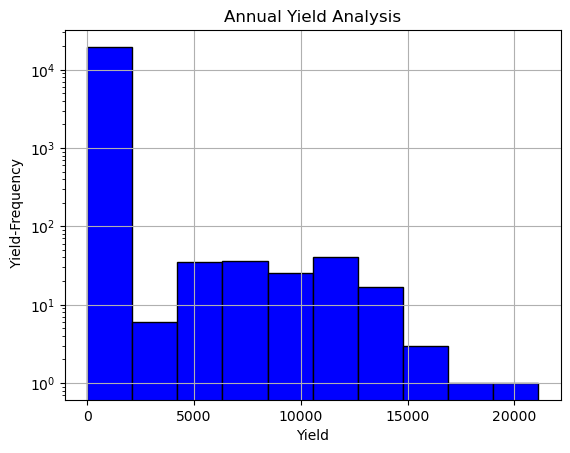

In [49]:
df['Yield'].plot(kind='hist',color = 'blue',edgecolor='black')
plt.title('Annual Yield Analysis')
plt.xlabel('Yield')
plt.yscale('log')
plt.ylabel(' Yield-Frequency')
plt.grid(True)
plt.show()

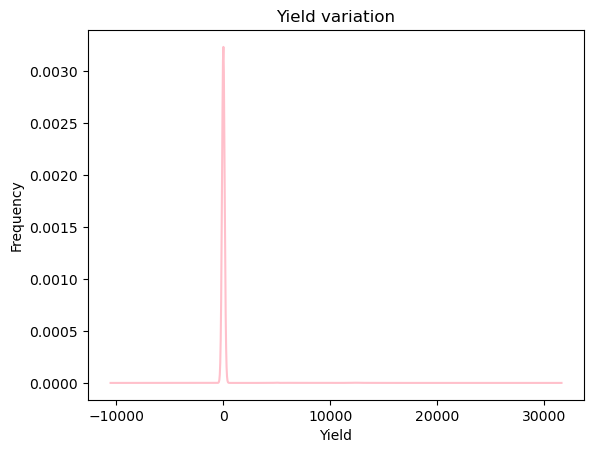

12.785264685628691

In [50]:
df['Yield'].plot(kind='kde',color='pink')
plt.title('Yield variation')
plt.xlabel('Yield')
plt.ylabel('Frequency')
plt.show()
df['Yield'].skew()

394

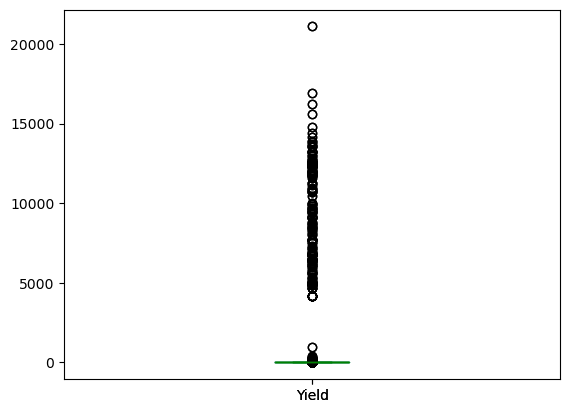

In [51]:
#Checking for Outliers
df['Yield'].plot(kind='box')
df['Yield'].plot(kind='box',color='green')
# Define the 1st and 99th percentiles
lower_percentile = df['Yield'].quantile(0.01)
upper_percentile = df['Yield'].quantile(0.99)

# Detect outliers based on percentiles
outliers_percentile = df[(df['Yield'] < lower_percentile) | (df['Yield'] > upper_percentile)]
outliers_count_percentile = len(outliers_percentile)
outliers_count_percentile

In [52]:
df['Yield'].isnull().sum()

0

## Bivariate Analysis

**Overview**
In bilateral data analysis we have to find relation between various related numerical and categorical column 

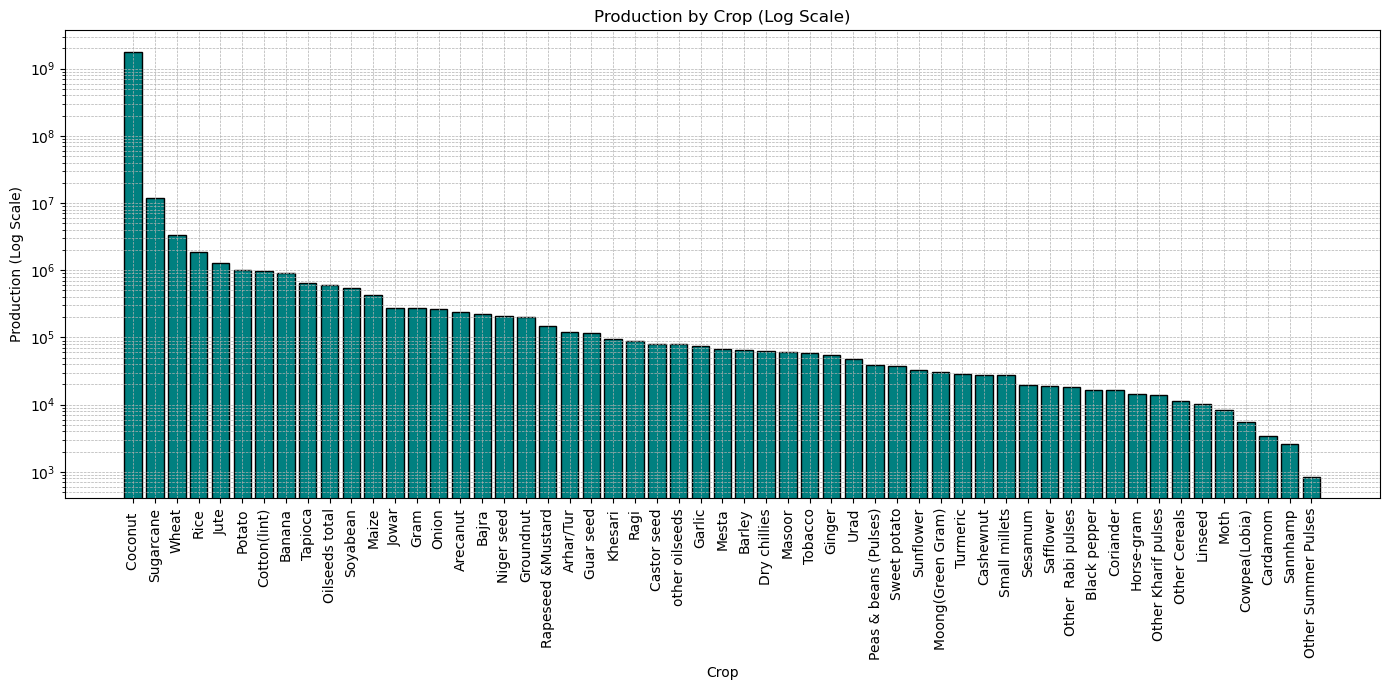

In [54]:
# Group by 'Crop' and calculate mean Production and Yield
crop_data = df.groupby('Crop')[['Production', 'Yield']].mean().sort_values(by='Production', ascending=False).reset_index()

# Plot Production by Crop with logarithmic scale
plt.figure(figsize=(14, 7))
plt.bar(crop_data['Crop'], crop_data['Production'], color='teal', edgecolor='black')
plt.title('Production by Crop (Log Scale)')
plt.xlabel('Crop')
plt.ylabel('Production (Log Scale)')
plt.yscale('log')  # Apply logarithmic scale to the y-axis
plt.xticks(rotation=90)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()




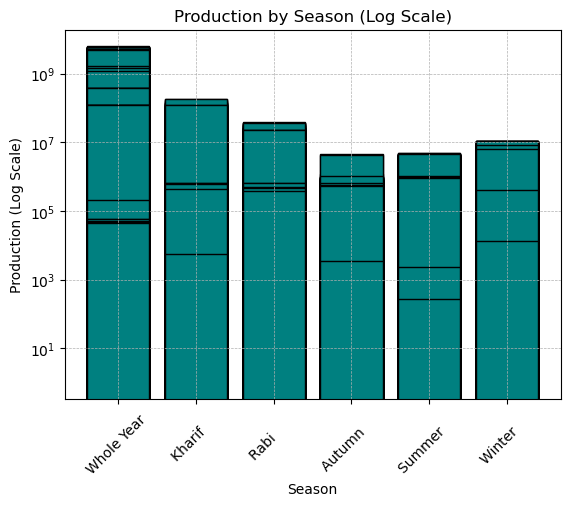

In [55]:

# Group by 'Season' and calculate mean Production and Yield
season_grouped = df.groupby('Season')[['Production', 'Yield']].mean().sort_values(by='Production', ascending=False)

# Plot Production by Season as a histogram with a logarithmic scale

plt.bar(df['Season'], df['Production'], color='teal', edgecolor='black')
plt.title('Production by Season (Log Scale)')
plt.xlabel('Season')
plt.ylabel('Production (Log Scale)')
plt.yscale('log') 
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)


In [56]:
# Group by State Analyzing Production and Yield
crop_Production=df.groupby('State')[['Production','Yield']].mean().sort_values(by='Production',ascending=False)

print(crop_Production.head(10))

                  Production       Yield
State                                   
Kerala          2.428851e+08  276.611148
Tamil Nadu      9.495348e+07  226.050221
Karnataka       4.453408e+07  105.720578
Andhra Pradesh  2.059733e+07  181.465391
Goa             8.918692e+06  354.780305
West Bengal     8.172924e+06  266.898311
Uttar Pradesh   5.384952e+06    5.053113
Assam           4.976354e+06  219.716345
Maharashtra     2.439695e+06    4.401030
Punjab          1.968643e+06    4.852817


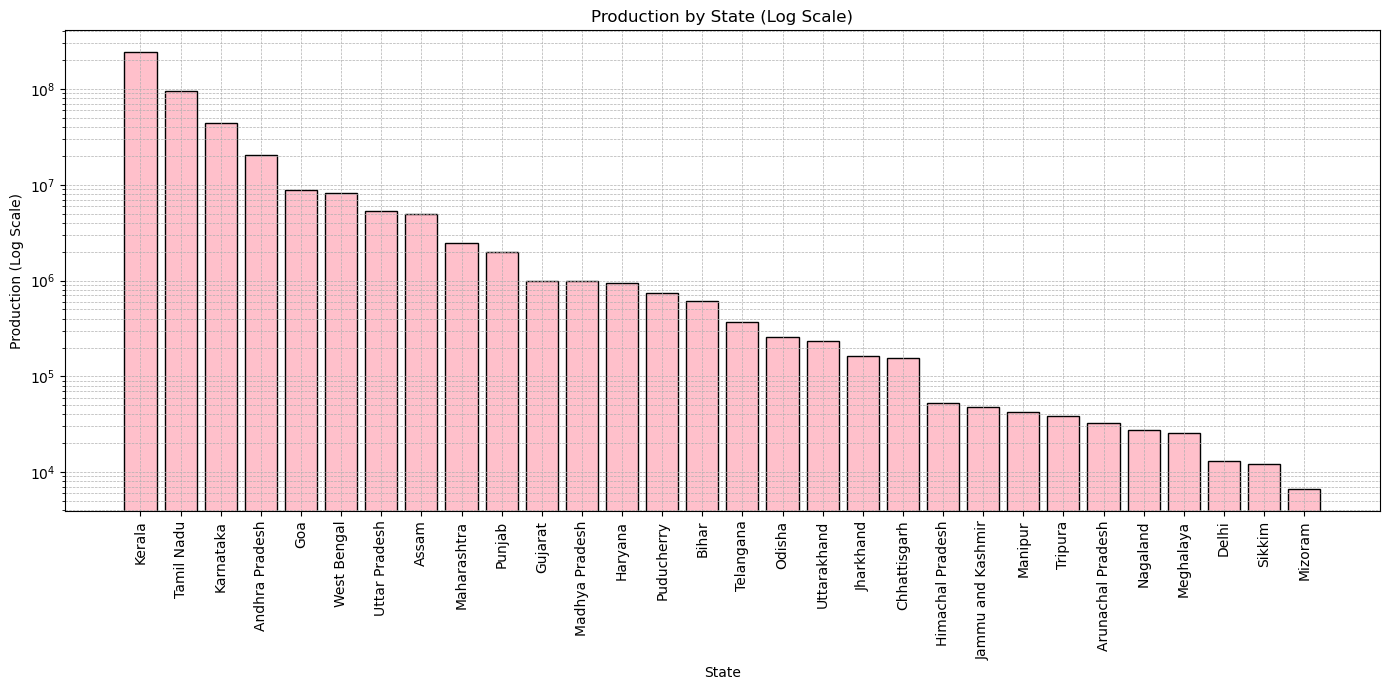

In [57]:
# Group by 'State' and calculate mean Production and Yield
state_data = df.groupby('State')[['Production', 'Yield']].mean().sort_values(by='Production', ascending=False).reset_index()

# Plot Production by State with logarithmic scale
plt.figure(figsize=(14, 7))
plt.bar(state_data['State'], state_data['Production'], color='pink', edgecolor='black')
plt.title('Production by State (Log Scale)')
plt.xlabel('State')
plt.ylabel('Production (Log Scale)')
plt.yscale('log')  
plt.xticks(rotation=90)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

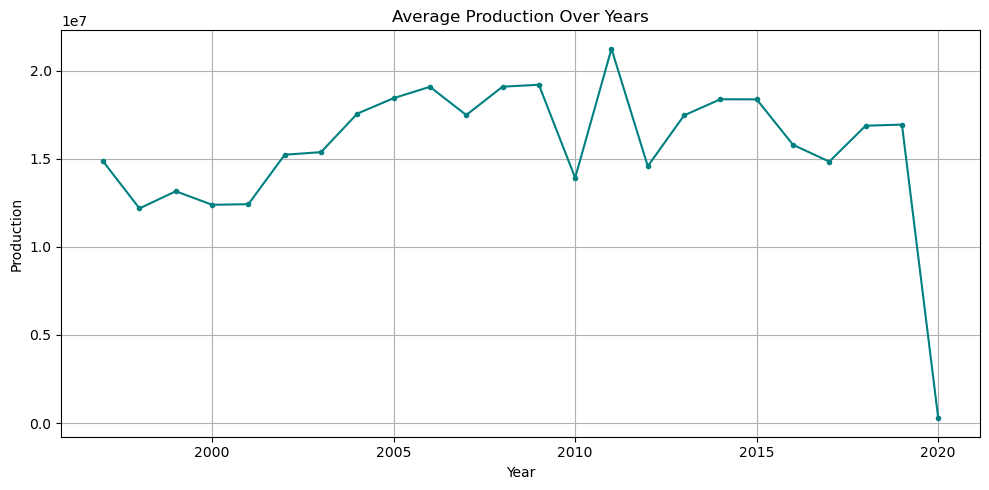

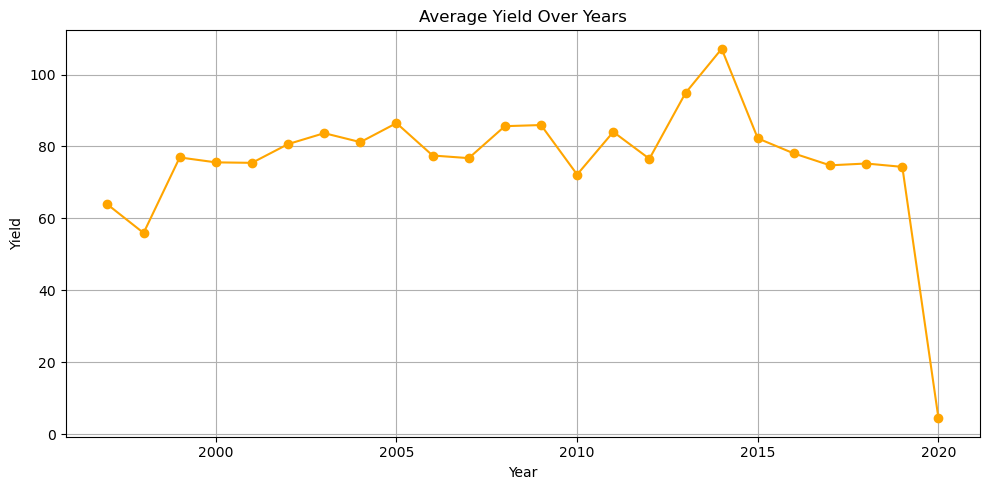

In [58]:
# Group by year and calculate mean Production and Yield
year_grouped = df.groupby('Crop_Year')[['Production', 'Yield']].mean().reset_index()

# Plot time series for Production
plt.figure(figsize=(10, 5))
plt.plot(year_grouped['Crop_Year'], year_grouped['Production'], marker='.', color='teal')
plt.title('Average Production Over Years')
plt.xlabel('Year')
plt.ylabel('Production')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot time series for Yield
plt.figure(figsize=(10, 5))
plt.plot(year_grouped['Crop_Year'], year_grouped['Yield'], marker='o',  color='orange')
plt.title('Average Yield Over Years')
plt.xlabel('Year')
plt.ylabel('Yield')
plt.grid(True)
plt.tight_layout()
plt.show()
